<a href="https://colab.research.google.com/github/Flaschix/FirstRepository/blob/master/predators_and_preys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

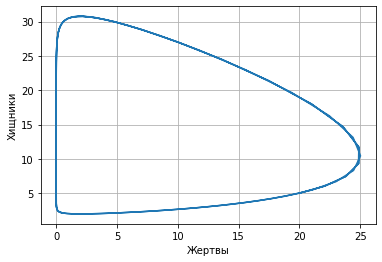

In [58]:
import numpy as np

import matplotlib.pyplot as plt

def lotka(x, args):
  a = args["a"]
  b = args["b"]
  c = args["c"]
  d = args["d"]

  xDot = np.array([a * x[0] - b * x[0] * x[1], d * x[0] * x[1] - c * x[1]])
  return xDot

def rungeKutt(f, x0, t0, tf, dt):
  t = np.arange(t0,tf,dt)
  nt = t.size
  nx = x0.size
  x = np.zeros((nx,nt))

  x[:,0] = x0
  for k in range(nt - 1):
    k1 = dt * f(t[k], x[:,k])
    k2 = dt * f(t[k] + dt/2, x[:,k] + k1/2)
    k3 = dt * f(t[k] + dt/2, x[:,k] + k2/2)
    k4 = dt * f(t[k] + dt, x[:,k] + k3)

    dx = (k1 + 2 * k2 + 2 * k3 + k4)/6

    x[:, k+1] = x[:, k] + dx
  
  return x, t

args = {"a": 1.1, "b": 0.4, "c": 0.4, "d": 0.1}

f = lambda t, x : lotka(x, args)

x0 = np.array([20, 5])

t0 = 0
tf = 50
dt = 0.1

x, t = rungeKutt(f, x0, t0, tf, dt)

# plt.subplot(1, 1, 1)
# plt.plot(t, x[0, :], "r", label="Жертвы")
# plt.plot(t, x[1, :], "b", label="Хищники")
# plt.xlabel("Время")
# plt.grid()
# plt.legend()

# plt.show()

plt.subplot(1, 1, 1)
plt.plot(x[0, :], x[1, :])
plt.xlabel("Жертвы")
plt.ylabel("Хищники")
plt.grid()

plt.show()